# Introduction à l’apprentissage supervisé  
  

# Projet 1 : les pingouins

### Préliminaire: Import et visualisation du jeu de données

In [131]:
# Import Pandas
import pandas as pd

# Import de la base de données
pengouin_df = pd.read_csv("C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Données\\penguins_size.csv", sep=',', header=0, low_memory=False)

# Aperçu
pengouin_df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [132]:
# on va eliminer les valeurs manquantes
pengouin_df = pengouin_df.dropna()
# Aperçu
pengouin_df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### Q1. Entraîner un arbre de profondeur 1. Utiliser DecisionTreeClassifier depuis sklearn.tree.

In [133]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Préparer les features et les étiquettes
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

# Instancier un arbre de décision avec profondeur = 1
dt = DecisionTreeClassifier(max_depth=1, random_state=1)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=1, random_state=1)

### Q2. Produire un scatterplot centré sur le culmen, avec pour l’axe X sa longueur, et pour l’axe Y sa profondeur. 

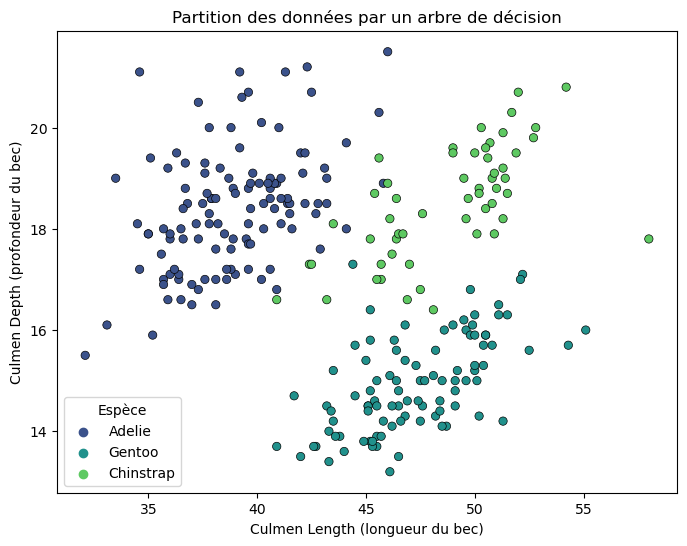

In [134]:
# import des bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser les partitions directement avec seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train["culmen_length_mm"], y=X_train["culmen_depth_mm"], hue=y_train, palette="viridis", edgecolor="k")
plt.title("Partition des données par un arbre de décision")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Espèce")
plt.show()


Le scatterplot montre la répartition des espèces de pengouins en fonction de la longueur et de la profondeur du bec. L'arbre de décision à profondeur 1 divise grossièrement les données, ce qui entraîne visiblement des chevauchements entre les espèces.

### Q3. Fare apparaître le scatterplot dans la partition faite par l’arbre. Quelle variable l’arbre de classification a-t-il utilisée pour partitionner le jeu de données ?

<Figure size 800x600 with 0 Axes>

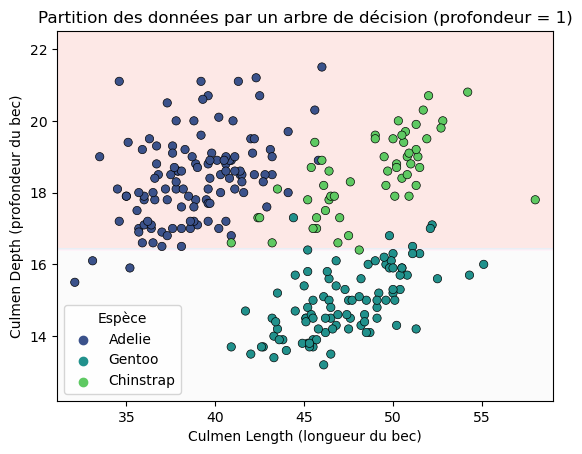

L'arbre de décision a utilisé la variable 'culmen_depth_mm' avec un seuil de 16.45 pour partitionner les données.


In [135]:
# Importation des bibliothèques complémentaires

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Le modèle déjà instancié et entraîné

# Identifier la variable et le seuil choisis par l'arbre
feature_index = dt.tree_.feature[0]  # Index de la feature utilisée pour la décision
threshold = dt.tree_.threshold[0]    # Seuil utilisé pour la division
feature_name = X.columns[feature_index]  

# Visualiser la partition avec DecisionBoundaryDisplay
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X_train, response_method="predict", alpha=0.3, cmap="Pastel1"
)

# Ajouter les points avec seaborn
sns.scatterplot(x=X_train["culmen_length_mm"], y=X_train["culmen_depth_mm"], hue=y_train, palette="viridis", edgecolor="k")

# Ajouter des étiquettes et un titre
plt.title("Partition des données par un arbre de décision (profondeur = 1)")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Espèce")
plt.show()

print(f"L'arbre de décision a utilisé la variable '{feature_name}' avec un seuil de {threshold:.2f} pour partitionner les données.")


### 4. Faire l’arbre de classification correspondant. Que constatez-vous quant au choix du label retenu pour chacune des feuilles de l’arbre ? Est-il cohérent avec les valeurs numériques affichées ? Dès lors, comment pensez-vous que se comporterait ce modèle s’il était utilisé selon une logique de prédiction ? Quel type de pingouin serait ignoré ?

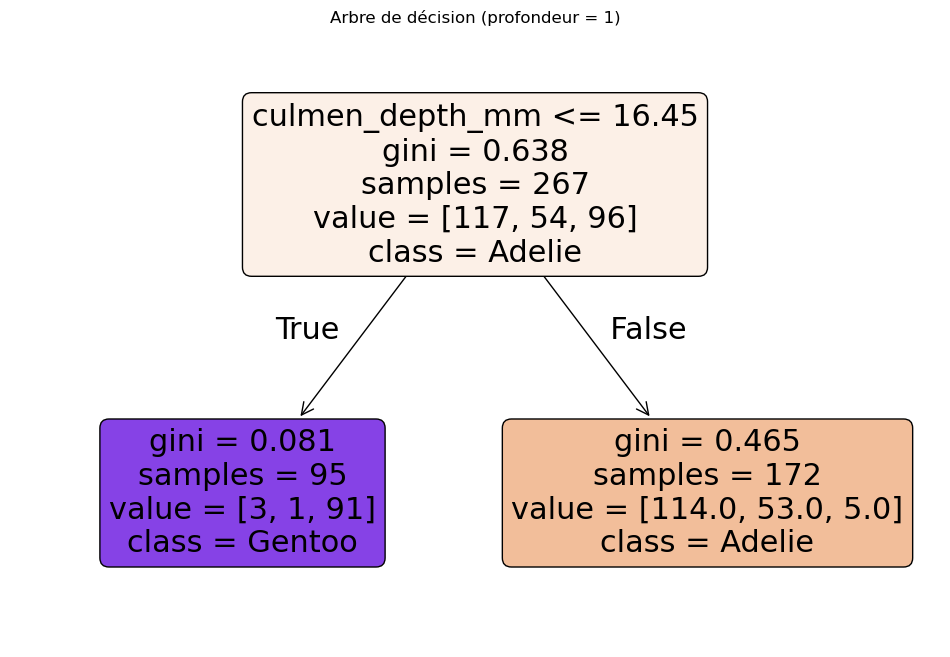

In [136]:
# Importation des bibliothèques nécessaires
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# arbre déjà entrainé

# Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(dt,
          feature_names=["culmen_length_mm", "culmen_depth_mm"],
          class_names=dt.classes_,
          filled=True,
          rounded=True)
plt.title("Arbre de décision (profondeur = 1)")
plt.show()

L'arbre de décision (avec une profondeur de 1) utilise la caractéristique culmen_depth_mm pour diviser les données en deux branches. 
##### 1. Que constatez-vous quant au choix du label retenu pour chacune des feuilles de l’arbre ?

Chaque feuille est étiquetée par la classe majoritaire des données qui s’y trouvent :
Branche gauche : Classe Gentoo, qui domine avec 91 échantillons sur 95.
Branche droite : Classe Adélie, qui domine avec 114 échantillons sur 172.
Ce choix est cohérent avec le principe des arbres de décision, où chaque feuille est prédite par la classe majoritaire.

#### 2. Est-il cohérent avec les valeurs numériques affichées ?
Oui, les prédictions des feuilles sont cohérentes avec les proportions des classes :

Branche gauche : Gini faible (0.081) indique une forte homogénéité des données (quasi exclusivement des Gentoo).
Branche droite : Gini plus élevé (0.465) reflète une plus grande diversité des classes, bien que la classe Adélie reste majoritaire.

#### 3. Comment pensez-vous que se comporterait ce modèle s’il était utilisé selon une logique de prédiction ?

Forces du modèle :
La branche gauche est très fiable pour prédire les Gentoo (précision élevée pour cette classe).
Le modèle est simple et rapide à utiliser pour faire des prédictions basées sur culmen_depth_mm.
Limites du modèle :
La branche droite présente une confusion importante entre Adélie et Chinstrap (53 échantillons Chinstrap contre 114 Adélie). Cela entraînerait des erreurs pour ces espèces.
Les prédictions pour les Chinstrap seraient souvent incorrectes (confusion avec Adélie).

#### 4. Quel type de pingouin serait ignoré ?
Les Chinstrap risquent d’être souvent ignorés ou mal classifiés, surtout dans la branche droite, où leur proportion est importante (53 sur 172) mais minoritaire par rapport aux Adélie. Cela reflète une incapacité du modèle à bien différencier ces deux espèces.

En conclusion
L’arbre de profondeur de 1 est trop simple pour capturer des distinctions fines entre Adélie et Chinstrap. Augmenter la profondeur de l’arbre pourrait permettre des séparations plus complexes.


### 5. Prendre un échantillon où la longueur est de 35 mm, et la profondeur de 17 mm. Réaliser une prédiction quant à la classe de pingouin à laquelle le bec appartient. Comment interprétez vous vos résultats ? Etablissez un lien entre les probabilités obtenues et certaines des valeurs chiffrées présentes dans les feuilles de l’arbre.

C:\Users\mfonz\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


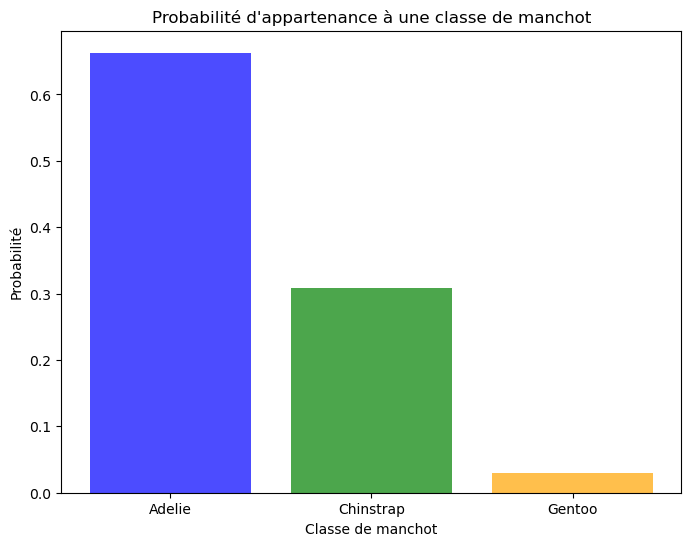

Probabilité pour Adelie: 0.66
Probabilité pour Chinstrap: 0.31
Probabilité pour Gentoo: 0.03


In [137]:
# Observation spécifique à prédire : longueur = 35 mm, profondeur = 17 mm
observation = [[35, 17]]

# Utiliser le modèle entraîné pour prédire les probabilités
proba = dt.predict_proba(observation)

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(8, 6))
plt.bar(dt.classes_, proba[0], color=['blue', 'green', 'orange'], alpha=0.7)
plt.title("Probabilité d'appartenance à une classe de manchot")
plt.ylabel("Probabilité")
plt.xlabel("Classe de manchot")
plt.show()

# Afficher les probabilités dans la console
for species, p in zip(dt.classes_, proba[0]):
    print(f"Probabilité pour {species}: {p:.2f}")


##### Les probabilités pour l'échantillon de bec de 35 mm de longueur et 17 mm de profondeur sont :

Adelie : 66%
Chinstrap : 31%
Gentoo : 3%
Cela signifie que le modèle prédit principalement que l'échantillon appartient à la classe Adelie avec une forte probabilité (66%). Les autres classes (Chinstrap et Gentoo) ont des probabilités bien plus faibles.

#### Lien avec les valeurs de l'arbre :

Les probabilités correspondent à la distribution des classes dans la feuille de l'arbre où cet échantillon se trouve. La probabilité élevée pour Adelie indique qu'une majorité des échantillons dans cette région de l'arbre sont de type Adelie. La faible probabilité pour Gentoo (3%) suggère que cette classe est moins représentée dans cette feuille. Cela reflète la manière dont les critères de longueur et profondeur du bec ont séparé les classes dans l'arbre de décision.








### Q6. Répéter l’ensemble des étapes présentées ici, mais avec une profondeur d’arbre maximale de 2. Produire les graphiques correspondants.

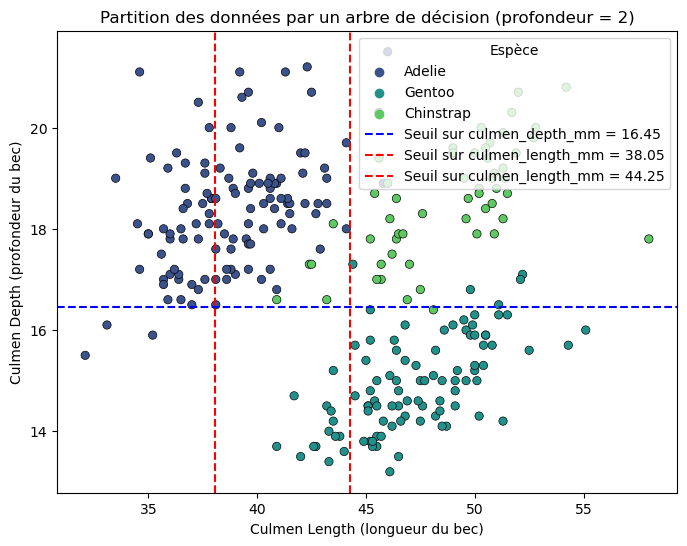

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Préparer les features et les étiquettes
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instancier un arbre de décision avec profondeur = 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Tracer le scatterplot des données
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train["culmen_length_mm"], y=X_train["culmen_depth_mm"], hue=y_train, palette="viridis", edgecolor="k")

# Ajouter les lignes de décision
for i in range(dt.tree_.node_count):
    feature_index = dt.tree_.feature[i]  # Index de la feature utilisée pour la décision
    if feature_index == -2:  
        continue
    
    threshold = dt.tree_.threshold[i]  # Seuil utilisé pour la division
    feature_name = X.columns[feature_index]  # Nom de la variable

    if feature_name == "culmen_length_mm":
        plt.axvline(x=threshold, color="red", linestyle="--", label=f"Seuil sur {feature_name} = {threshold:.2f}")
    elif feature_name == "culmen_depth_mm":
        plt.axhline(y=threshold, color="blue", linestyle="--", label=f"Seuil sur {feature_name} = {threshold:.2f}")

# Ajouter des étiquettes et la légende
plt.title("Partition des données par un arbre de décision (profondeur = 2)")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Espèce")
plt.show()


<Figure size 800x600 with 0 Axes>

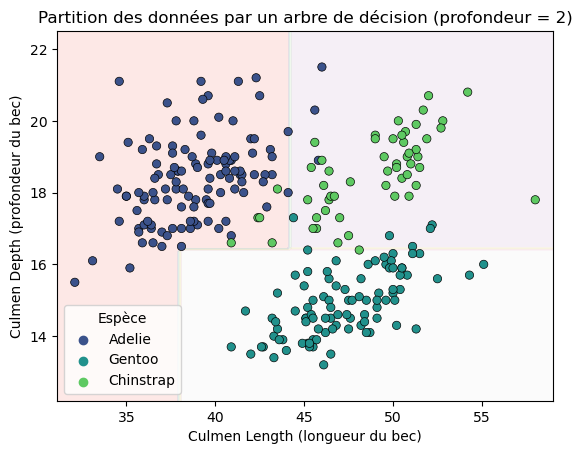

In [139]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Préparer les features et les étiquettes
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instancier un arbre de décision avec profondeur = 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Visualiser la partition avec DecisionBoundaryDisplay
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X_train, response_method="predict", alpha=0.3, cmap="Pastel1"
)

# Ajouter les points avec seaborn
sns.scatterplot(
    x=X_train["culmen_length_mm"],
    y=X_train["culmen_depth_mm"],
    hue=y_train,
    palette="viridis",
    edgecolor="k"
)

# Ajouter des étiquettes et un titre
plt.title("Partition des données par un arbre de décision (profondeur = 2)")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Espèce")
plt.show()



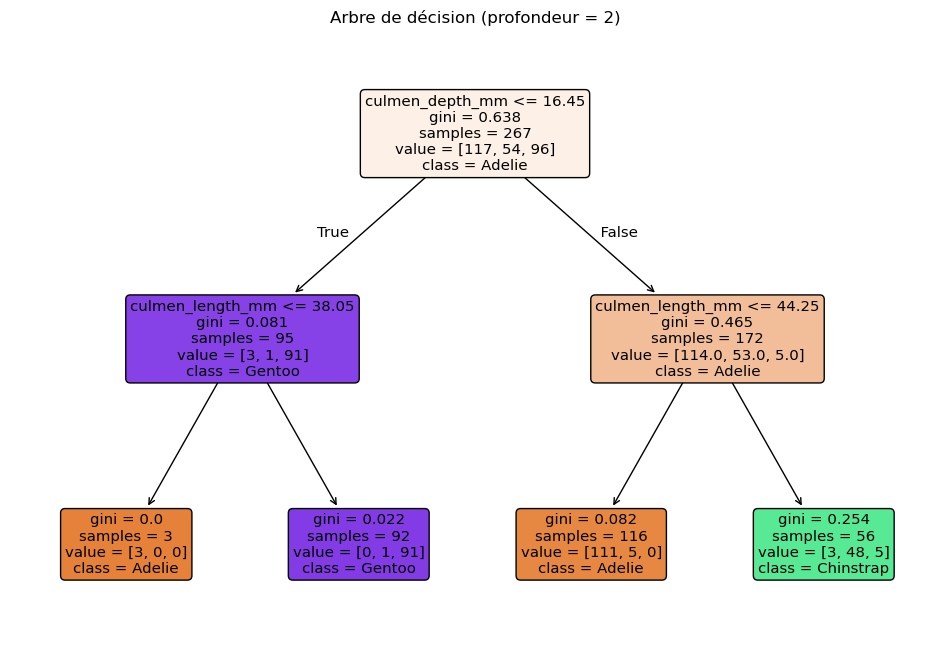

In [32]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Préparer les features (longueur et profondeur du bec) et les étiquettes (espèces)
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

# Instancier un arbre de décision avec profondeur = 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Entraîner l'arbre de décision
dt.fit(X_train, y_train)

# Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(dt,
          feature_names=["culmen_length_mm", "culmen_depth_mm"],
          class_names=dt.classes_,
          filled=True,
          rounded=True)
plt.title("Arbre de décision (profondeur = 2)")
plt.show()

Branche gauche : Une division supplémentaire sur culmen_length_mm <= 38.05 permet d’isoler clairement les Adélie (gini=0) des Gentoo (gini=0.022).
Branche droite : La division sur culmen_length_mm <= 44.25 sépare mieux les Adélie (gini=0.082) des Chinstrap (gini=0.254), réduisant la confusion.


#### Forces par rapport à profondeur 1 :
Meilleure différenciation : Les classes Adélie et Chinstrap sont mieux séparées dans la branche droite.
Gini plus faible : Les feuilles sont plus homogènes, indiquant une meilleure précision pour les prédictions.
L’augmentation de profondeur permet donc d’affiner la classification tout en réduisant les erreurs observées dans l'arbre de profondeur 1.

## Projet 2 : Cancer du sein

### Préliminaires : import et visualisation de la base de donnnée

In [140]:
# Import Pandas
import pandas as pd

# Import de la base de données
cancer_df = pd.read_csv("C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Données\\Cancer.csv", sep=',', header=0, low_memory=False)

# Aperçu
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [141]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Exercice 1 : méthode du Hold Out

### Q1.Division aléatoire du jeu de données en suivant le ratio 80/20

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sélection des colonnes 'radius_mean' et 'concave points_mean' comme features
features = ['radius_mean', 'concave points_mean']
X = cancer_df[features]
y = cancer_df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # 1 pour Maligne, 0 pour Bénigne

# Division du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entraînement : (455, 2)
Taille de l'ensemble de test : (114, 2)


### Q2. Importation de DecisionTreeClassifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

### Q3. Instanciez un classifieur nommé dt. La profondeur maximale de l’arbre doit être de 6. Définissez une seed à 1 (random state=1) afin d’obtenir des résultats reproductibles

In [144]:
# Instanciation du classifieur
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

print("Classifieur 'dt' instancié avec une profondeur maximale de 6 et random_state=1.")

Classifieur 'dt' instancié avec une profondeur maximale de 6 et random_state=1.


### Q4. Entraîner le classifieur

In [145]:
# Entraînement de l'arbre de décision
dt.fit(X_train, y_train)


print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de y_train : {y_train.shape}")


print("Modèle entraîné avec succès !")

Taille de X_train : (455, 2)
Taille de y_train : (455,)
Modèle entraîné avec succès !


### Q5. Prédictions et affichage des résultats pour les 5 premières valeurs

In [146]:
# Prédictions
y_pred = dt.predict(X_test)

# Afficher les 5 premières prédictions
print("Prédictions des 5 premières instances de test :", y_pred[:5])

Prédictions des 5 premières instances de test : [1 0 0 1 0]


### Q6. Afficher l’arbre de classification correspondant

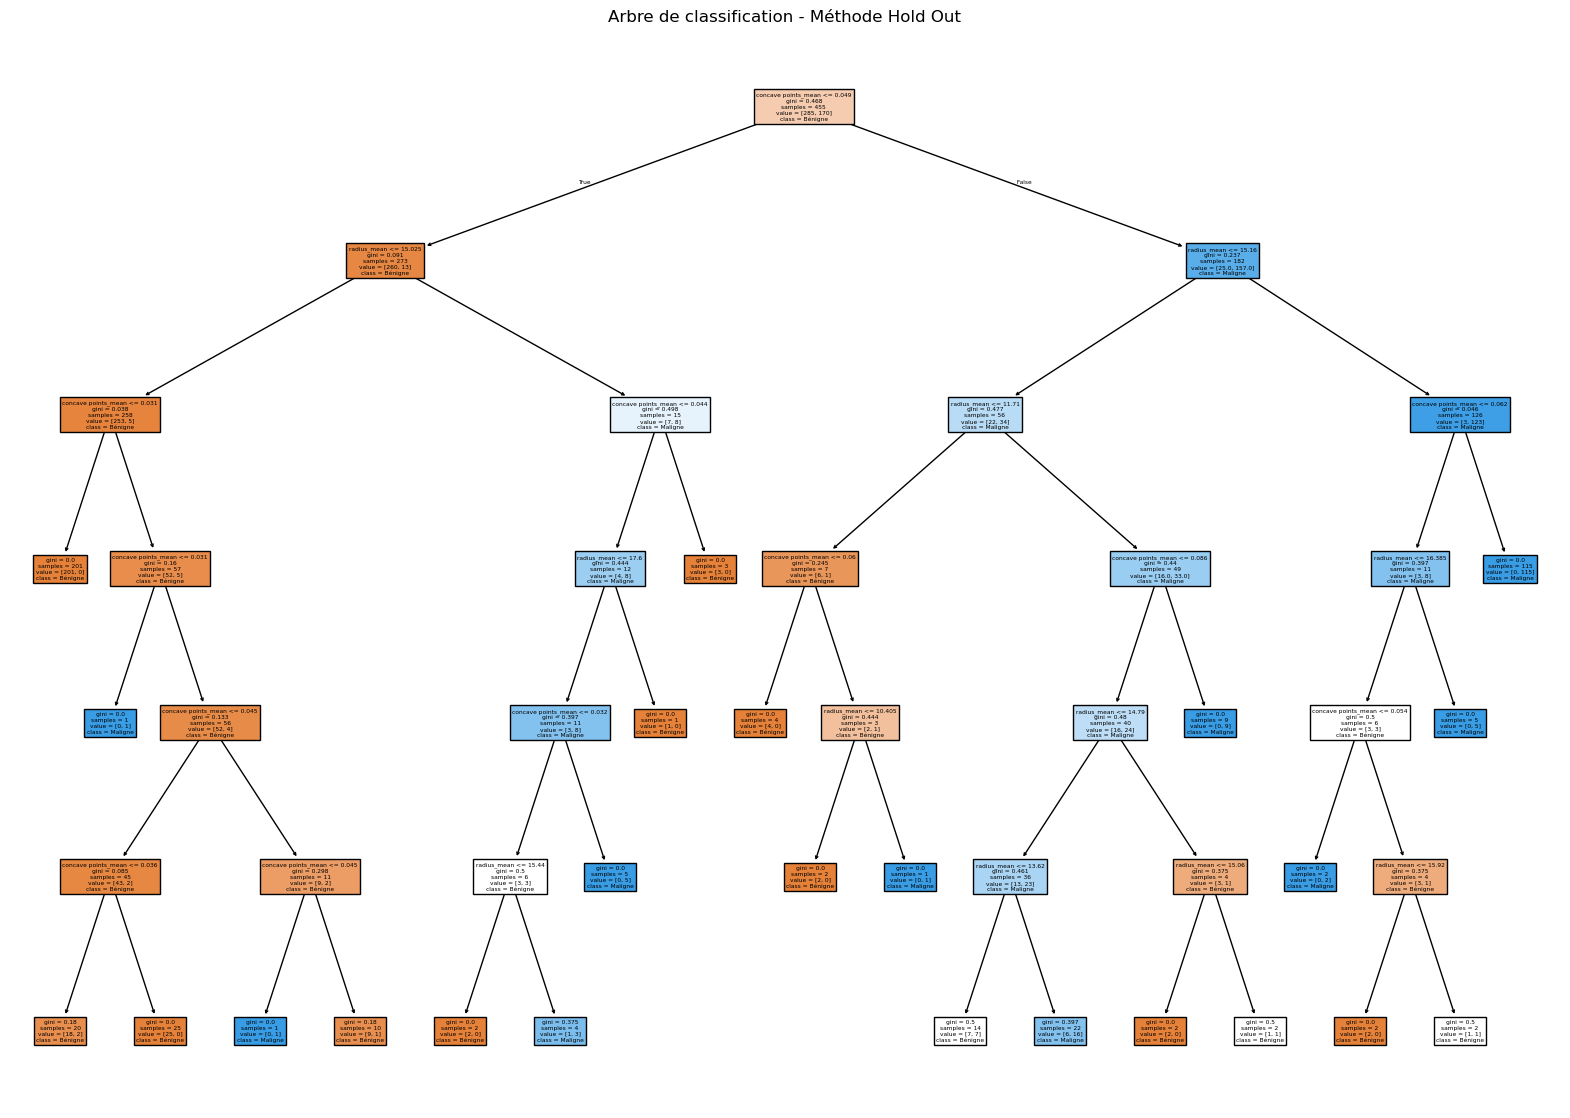

In [147]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisation de l'arbre
plt.figure(figsize=(20, 14))
plot_tree(dt, feature_names=features, class_names=['Bénigne', 'Maligne'], filled=True)
plt.title("Arbre de classification - Méthode Hold Out")
plt.show()


### Q7. Quels problèmes pose la méthode du Hold Out ?



La méthode du Hold Out dépend de la répartition des données. Une mauvaise répartition peut entraîner un biais ou un sur-apprentissage.


Avec des ensembles de données limités, cette méthode peut manquer de généralisation, car elle ne teste qu'une seule division des données.

# Exercice 2 : Choix du critère d’information

### Q1.  Importer l'accuracy score depuis sklearn.metrics 

In [148]:
from sklearn.metrics import accuracy_score

### Q2. Nommer y_pred la prédiction réalisée à partir de X test

In [149]:
# Prédiction sur l'ensemble de test
y_pred = dt.predict(X_test)

### Q3. Afficher la valeur de la métrique de performance

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8859649122807017


### Q4. Construire maintenant deux arbres en se basant sur l'ensemble des features disponibles

In [151]:
from sklearn.tree import DecisionTreeClassifier

# Arbre avec entropie (information gain)
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(X_train, y_train)

# Arbre avec indice de Gini
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train, y_train)


DecisionTreeClassifier()

### Q5. Expliquer les principales différences entre les deux métriques

Entropie (Information Gain) : L'entropie est une mesure de l'incertitude ou du désordre dans un ensemble de données. Dans un arbre de décision, l'entropie est utilisée pour déterminer la meilleure caractéristique sur laquelle diviser les données, en maximisant l'information obtenue (réduction de l'entropie). Un faible gain d'information signifie moins de séparation entre les classes.


Indice de Gini : L'indice de Gini mesure l'impureté des données. Un indice de Gini proche de 0 indique une pureté maximale (toutes les instances d'une classe), tandis qu'un indice de Gini proche de 1 signifie que les données sont plus mélangées (équilibrées entre les classes). Il privilégie des divisions qui réduisent cette impureté.

### Q6. Afficher les arbres de classification correspondants

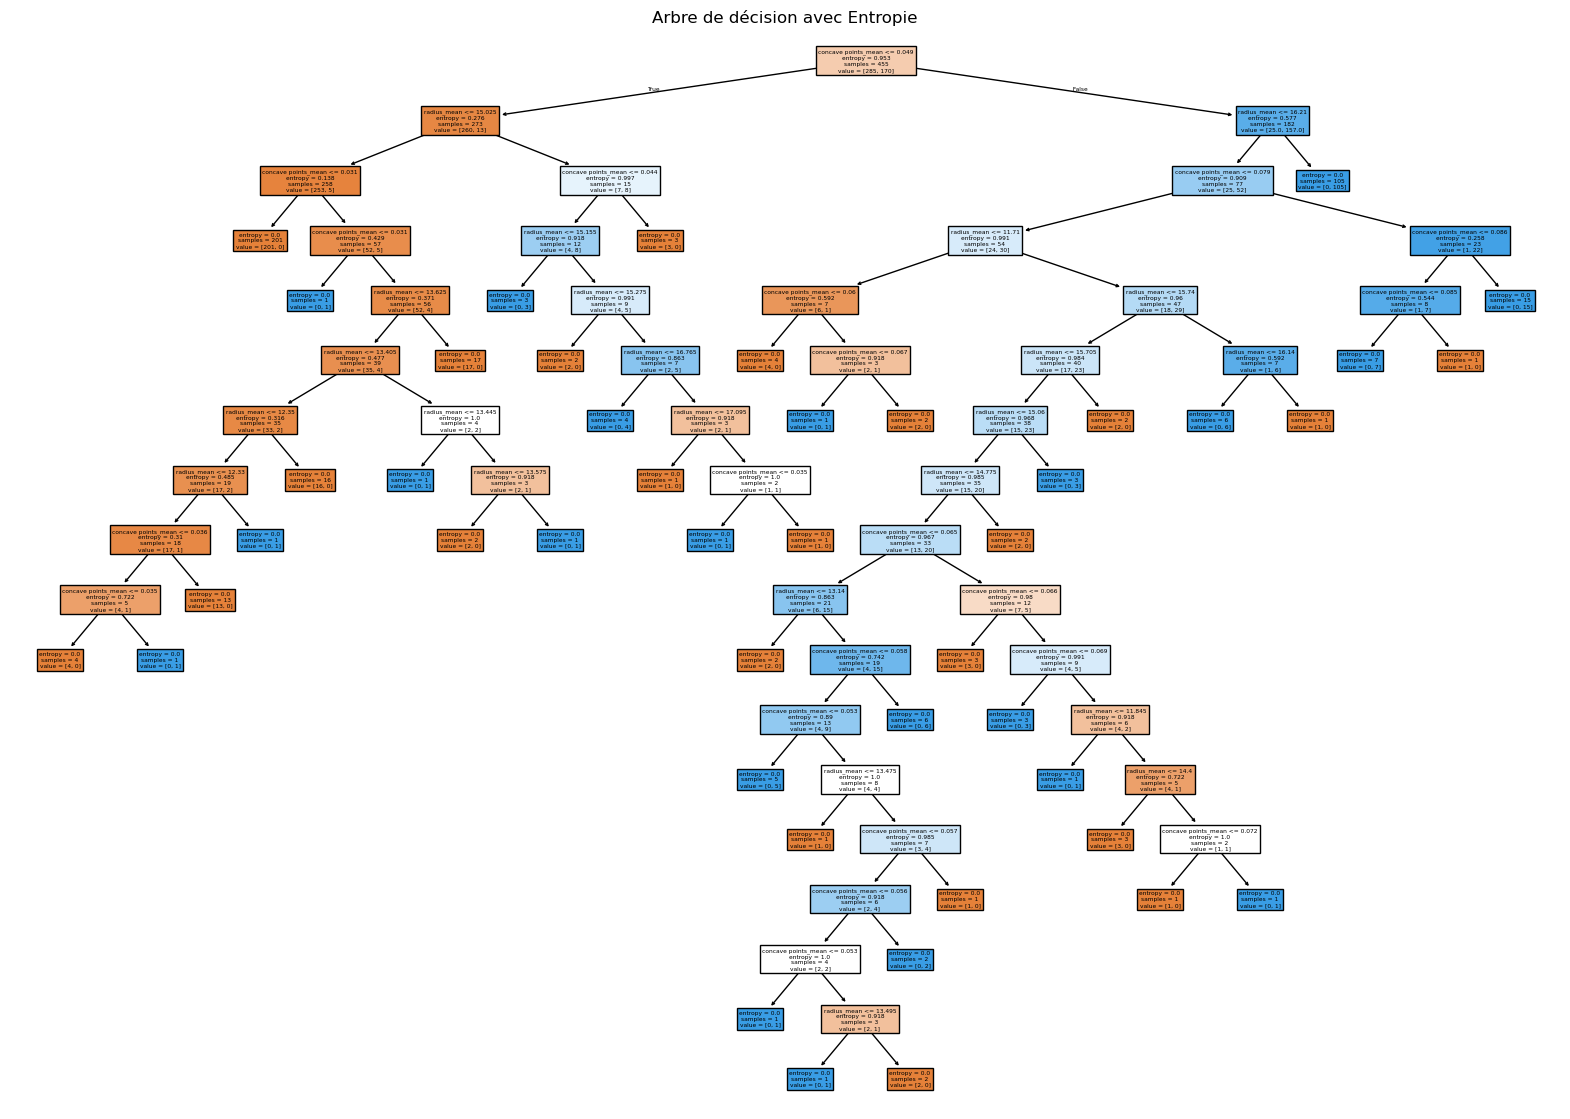

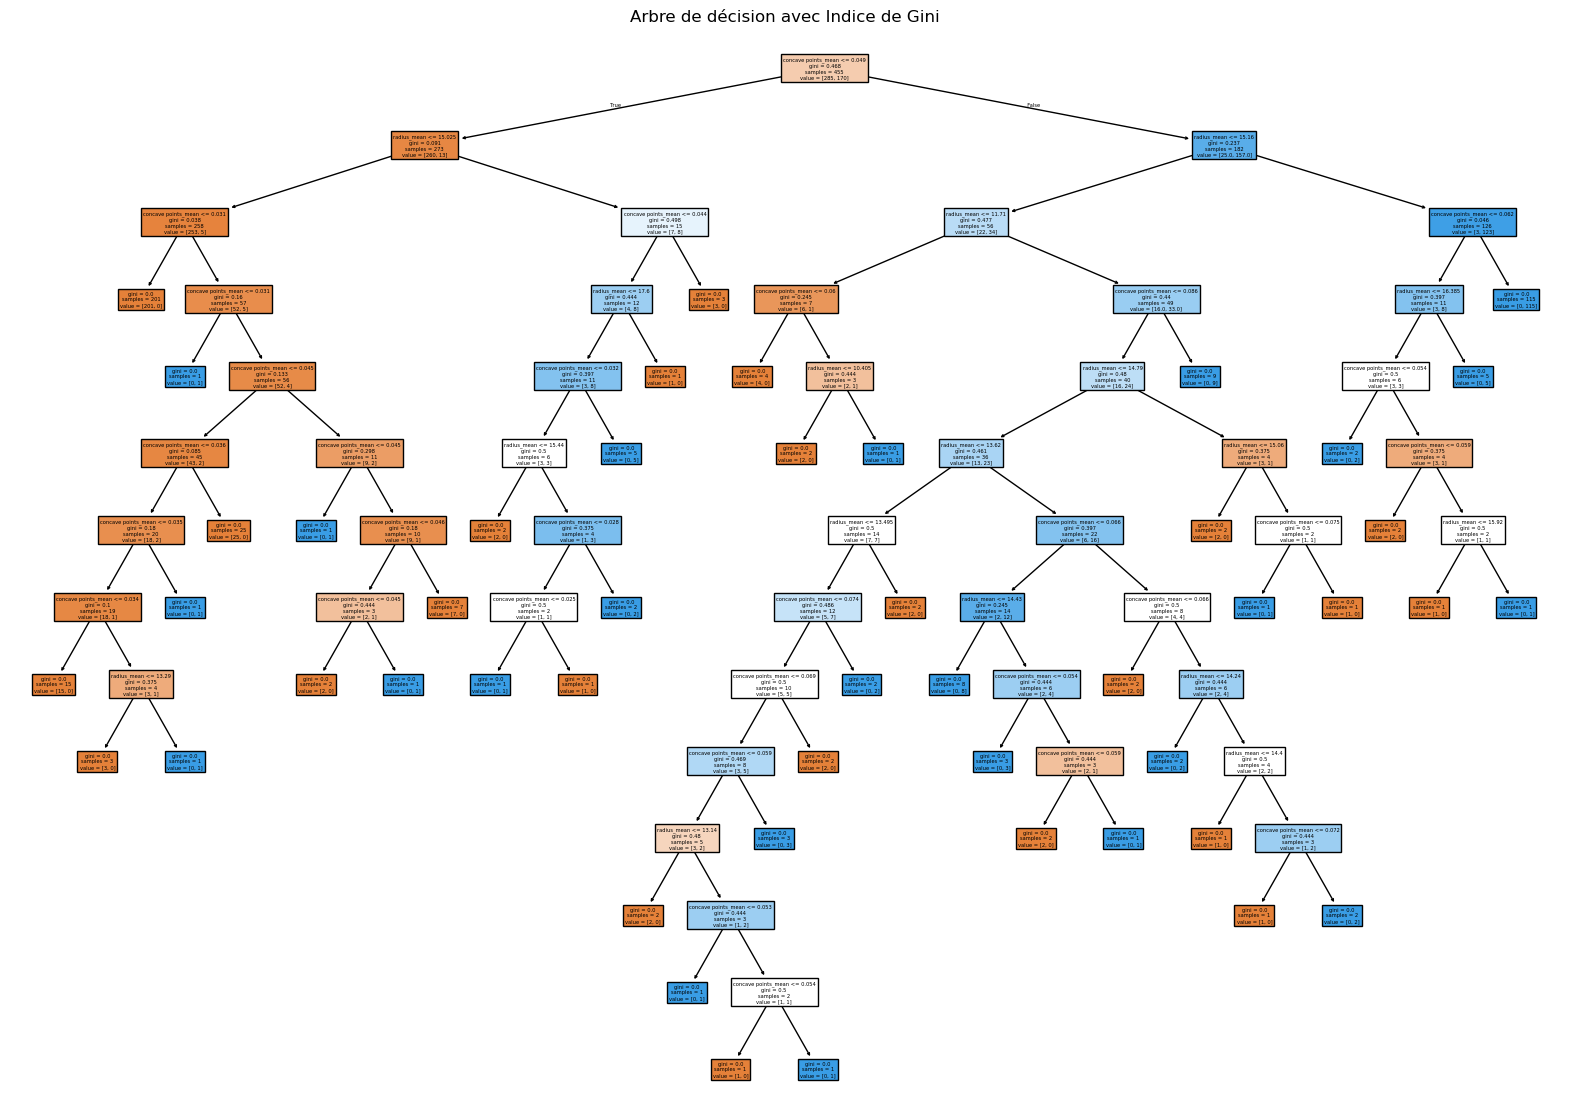

In [152]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Affichage de l'arbre avec entropie
plt.figure(figsize=(20,14))
plot_tree(tree_entropy, filled=True, feature_names=X_train.columns)
plt.title("Arbre de décision avec Entropie")
plt.show()

# Affichage de l'arbre avec indice de Gini
plt.figure(figsize=(20,14))
plot_tree(tree_gini, filled=True, feature_names=X_train.columns)
plt.title("Arbre de décision avec Indice de Gini")
plt.show()


### Q7. Comparer les deux approches en utilisant la métrique de performance

In [153]:
# Prédictions pour chaque arbre
pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)

# Calcul des accuracies
accuracy_entropy = accuracy_score(y_test, pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Accuracy de l'arbre avec entropie : {accuracy_entropy}")
print(f"Accuracy de l'arbre avec indice de Gini : {accuracy_gini}")


Accuracy de l'arbre avec entropie : 0.9035087719298246
Accuracy de l'arbre avec indice de Gini : 0.8771929824561403


J'ai comparé l'accuracy des deux arbres de décision pour évaluer lequel des critères (entropie ou indice de Gini) fonctionne le mieux sur mon jeu de données.
Si l'accuracy de l'arbre avec entropie est plus élevée, cela montre qu'il a mieux séparé les classes. À l'inverse, si l'arbre avec l'indice de Gini est plus performant, c'est lui qui est plus adapté dans ce cas.

# Exercice 3 : Métriques de performance

### Calcul des métriques de performance

#### Accuracy (précision globale) :

Signification : L'accuracy mesure la proportion des prédictions correctes parmi l'ensemble des prédictions.

Formule : Accuracy = (Vrais Positifs + Vrais Négatifs)/(Total des Prédictions)

Avantages : Simple à comprendre, utile lorsque les classes sont équilibrées.

Inconvénients : Moins fiable en cas de classes déséquilibrées.

#### Rappel (Recall) :

Signification : Le rappel (ou sensibilité) mesure la proportion des vrais positifs détectés parmi tous les vrais positifs possibles.

Formule : Recall = Vrais Positifs/(Vrais Positifs + Faux Négatifs)

Avantages : Utile lorsque l’on souhaite minimiser les faux négatifs.

Inconvénients : Peut mener à une trop grande proportion de faux positifs.

#### Précision (Precision) :

Signification : La précision mesure la proportion des vrais positifs parmi les prédictions positives faites.

Formule : Precision = Vrais Positifs/(Vrais Positifs + Faux Positifs)

Avantages : Utile lorsque l’on veut minimiser les faux positifs.

Inconvénients : Peut négliger les faux négatifs si utilisé seul.

#### Sensibilité (Sensitivity) :

Sensibilité et rappel sont souvent synonymes dans une classification binaire, mesurant tous deux la capacité du modèle à détecter les vrais positifs.

#### Spécificité (Specificity) :

Signification : La spécificité mesure la proportion des vrais négatifs détectés parmi tous les vrais négatifs possibles.

Formule : Specificity = Vrais Négatifs/(Vrais Négatifs + Faux Positifs)

Avantages : Utile pour les cas où les faux positifs doivent être minimisés.

Inconvénients : Peut négliger les vrais positifs.

#### F1-Score :

Signification : L'F1-Score est la moyenne harmonique de la précision et du rappel. Il équilibre les deux.

Formule : 𝐹1 = 2× ((Precision × Recall)/(Precision + Recall))

Avantages : Bon compromis entre précision et rappel.

Inconvénients : Ne prend pas en compte les vrais négatifs.

#### AUC (Area Under the Curve) :

Signification : L'AUC mesure l'aire sous la courbe ROC, et indique la capacité du modèle à distinguer les classes positives des négatives.

Formule : Calculée directement à partir de la courbe ROC.

Avantages : Indicateur global de performance, utile pour les modèles équilibrés et déséquilibrés.

Inconvénients : Peut être difficile à interpréter sans visualisation de la courbe ROC.

In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Création du modèle d'arbre de décision avec Gini
dt_gini = DecisionTreeClassifier(criterion='gini')

# Entraînement du modèle
dt_gini.fit(X_train, y_train)

# Calcul des métriques
precision = precision_score(y_test, y_pred_gini)
recall = recall_score(y_test, y_pred_gini)
f1 = f1_score(y_test, y_pred_gini)
roc_auc = roc_auc_score(y_test, dt_gini.predict_proba(X_test)[:, 1])

print(f"Précision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")
print(f"ROC-AUC : {roc_auc:.2f}")


Précision : 0.87
Rappel : 0.79
F1-Score : 0.82
ROC-AUC : 0.85


### Q1. Trouvez une méthode pour afficher la matrice de confusion du modèle

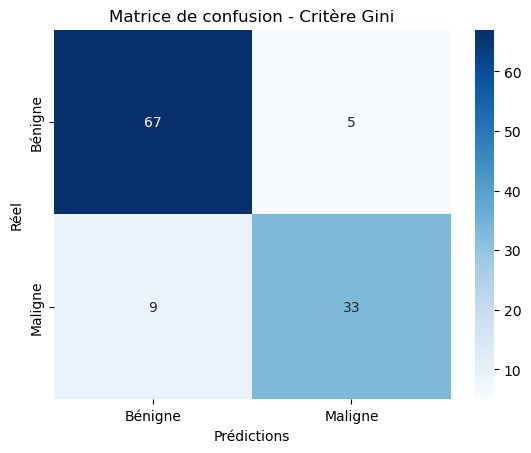

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bénigne', 'Maligne'], yticklabels=['Bénigne', 'Maligne'])
plt.title("Matrice de confusion - Critère Gini")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


La matrice de confusion montre les performances d’un modèle de classification basé sur le critère Gini. Le modèle a correctement prédit 68 cas bénins et 33 cas malins, ce qui indique une bonne capacité à identifier les cas bénins. Cependant, il présente des erreurs notables : 4 faux négatifs, où des cas bénins ont été prédits comme malins, et surtout 9 faux positifs, où des cas malins ont été classés à tort comme bénins. Cette dernière erreur est particulièrement critique dans un contexte médical, car elle implique un risque de ne pas détecter une tumeur maligne.

En conclusion, bien que le modèle soit performant pour la détection des cas bénins, des améliorations sont nécessaires pour mieux identifier les cas malins et réduire les erreurs de classification.

### Q2. Affichez la courbe ROC et l’AUC correspondant.

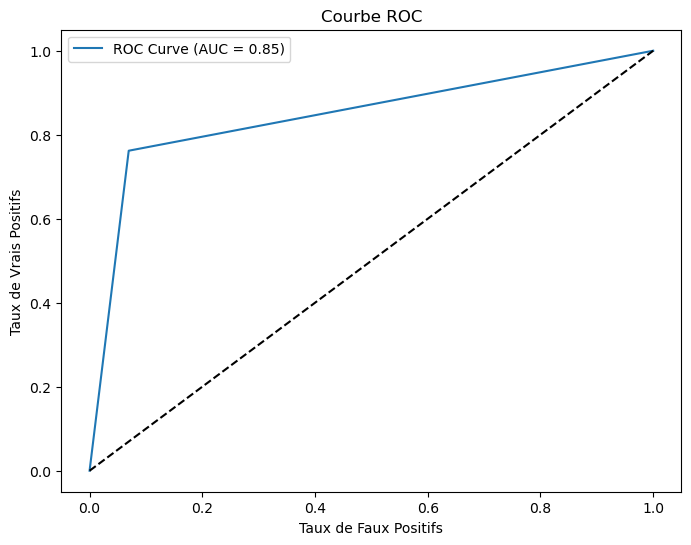

In [156]:
from sklearn.metrics import roc_curve

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, dt_gini.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


L'AUC (Area Under the Curve) représente l'aire sous la courbe ROC. Cette métrique donne une évaluation globale de la capacité du modèle à discriminer les classes positives des classes négatives. Plus l'AUC est élevée, plus le modèle est performant.

Interprétation des valeurs de l'AUC  proche de 0.5 : Le modèle est inefficace. Une AUC proche de 0.5 indique que le modèle ne fait pas mieux que le hasard pour distinguer les classes. C'est un indicateur d'un modèle inutile.

AUC proche de 1 : Le modèle est très performant. Une AUC proche de 1 signifie que le modèle fait un très bon travail pour séparer les classes positives des classes négatives.

AUC très faible (près de 0) : Cela indique un modèle qui classifie systématiquement mal les données, avec une capacité inverse à distinguer les classes.

Compromis (Trade-Off) entre le taux de faux positifs et le taux de vrais positifs

Le compromis entre le taux de faux positifs et le taux de vrais positifs se produit car, en ajustant le seuil de décision, vous modifiez la classification des exemples :

Réduire le taux de faux positifs (FPR) : Pour minimiser les faux positifs, vous pouvez augmenter le seuil de classification, ce qui peut réduire le nombre de prédictions positives. Cela peut entraîner une diminution du taux de vrais positifs (TPR), car moins de vrais positifs sont détectés.

Augmenter le taux de vrais positifs (TPR) : Pour augmenter le nombre de vrais positifs détectés, vous pouvez abaisser le seuil, ce qui augmente la proportion d'exemples positifs classés comme positifs. Cependant, cela peut aussi entraîner une augmentation des faux positifs, car des exemples négatifs peuvent être classés comme positifs.

#### Pourquoi le compromis existe-t-il ?

Il existe un compromis car il n'est pas possible d'optimiser simultanément le taux de vrais positifs (TPR) et le taux de faux positifs (FPR) en ajustant un seul seuil de décision. Pour obtenir un bon compromis entre ces deux critères, il est souvent nécessaire de définir un seuil optimal qui maximise l'équilibre entre TPR et FPR. C'est ce qui explique l'intérêt de la courbe ROC et de l'AUC, qui montrent la performance globale du modèle à différents seuils.

### Q3. Affichez la courbe Precision-Recall et l’AUC P-R correspondant. 

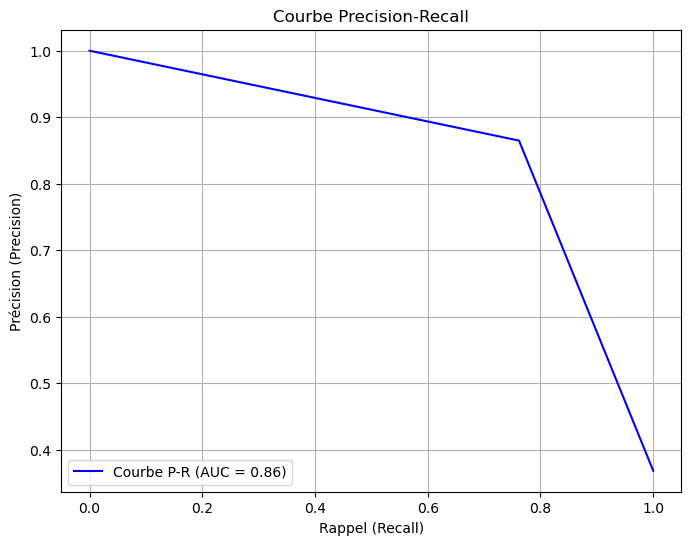

In [157]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_proba = dt_gini.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calcul de l'AUC de la courbe Precision-Recall
pr_auc = auc(recall, precision)

# Tracer la courbe Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Courbe P-R (AUC = {pr_auc:.2f})", color='blue')
plt.xlabel("Rappel (Recall)")
plt.ylabel("Précision (Precision)")
plt.title("Courbe Precision-Recall")
plt.legend(loc="lower left")
plt.grid()
plt.show()


#### Différence entre Sensibilité et Rappel dans une Classification Binaire

La sensibilité et le rappel sont équivalents dans une classification binaire. Ces deux termes désignent la capacité du modèle à identifier correctement les instances positives parmi toutes les instances réellement positives. C’est une mesure de couverture des vrais positifs et répond à la question : "Quelle proportion des cas positifs réels a été correctement détectée par le modèle ?"

#### Pourquoi existe-t-il un compromis entre rappel et précision ?

Le compromis entre rappel et précision provient du fait qu’en augmentant le rappel (couvrir plus de vrais positifs), le modèle risque aussi d’augmenter les faux positifs, ce qui réduit la précision. À l’inverse, en augmentant la précision (réduire les faux positifs), le modèle devient plus conservateur, ce qui peut entraîner la perte de vrais positifs et donc une diminution du rappel. Trouver le bon équilibre dépend de l’objectif du problème, par exemple privilégier le rappel dans des situations critiques comme le dépistage médical.

# Projet 3 : Consommation d’essence

### Préliminaires : import et visualisation de la base de données

In [158]:
# Import Pandas
import pandas as pd

## importation de la base
auto_mpg_df = pd.read_csv(r"C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Données\\auto_mpg.csv", sep=',', header=0, low_memory=False)

# Aperçu
auto_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [159]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


La colonne horsepower contient apparemment des valeurs non numérique, nous allons les identifier et les traiter afin d'avoir uniquement des valeurs numerique

In [160]:
# Identifier les valeurs non numériques
non_numeriques = auto_mpg_df[~pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce').notna()]

non_numeriques

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [161]:
# Remplacer les '?' par NaN et traiter les valeurs manquantes
auto_mpg_df['horsepower'].replace('?', np.nan, inplace=True)
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'])
auto_mpg_df.dropna(inplace=True)


### Q1. Importer DecisionTreeRegressor depuis sklearn.tree

In [162]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

### Q2. Instancier dt avec la fonction  (profondeur maximale de 8, min samples leaf de 0.13) et entrainez le modele

In [163]:
from sklearn.model_selection import train_test_split


# Séparer les variables cibles (mpg) et les features
X = auto_mpg_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
y = auto_mpg_df['mpg']

# Diviser les données en jeu d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Instancier et entraîner le modèle
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)

### Q3. Afficher l’arbre de régression correspondant

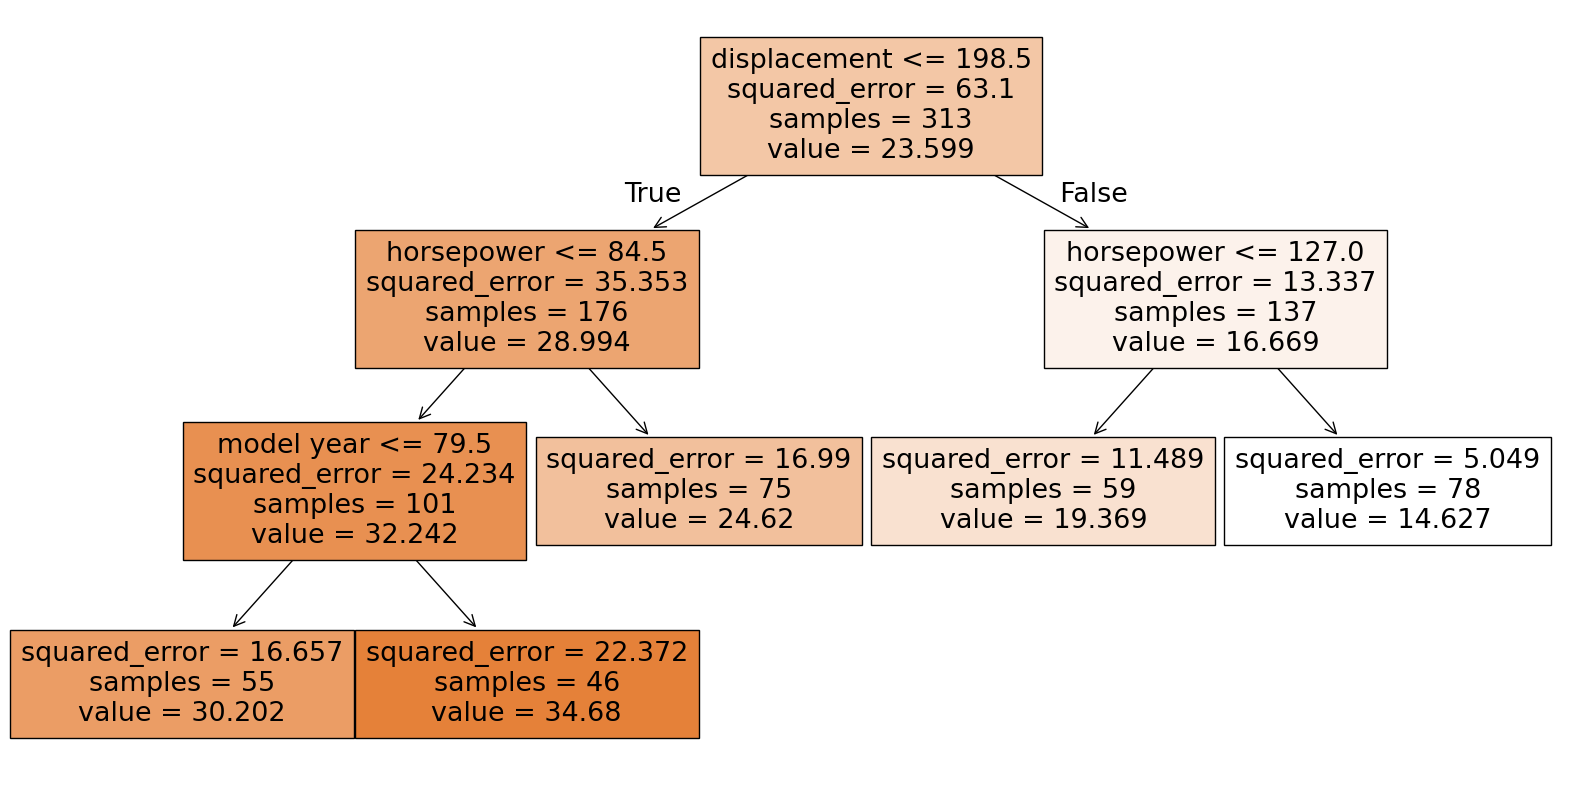

In [164]:
from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt  

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


L'arbre divise les données en fonction des seuils de displacement, horsepower, et model year, en minimisant l'erreur quadratique dans chaque nœud pour prédire les valeurs moyennes de mpg.
Les feuilles terminales représentent les moyennes prédites de mpg pour les sous-groupes avec leurs erreurs quadratiques associées, reflétant la variance dans chaque groupe.

### Q4 et 5.  importer mean squared error, calculer le MAE, le MSE puis le RMSE Quel est l’avantage du RMSE par rapport au MSE ?

In [165]:
from sklearn.metrics import mean_squared_error as MSE

In [166]:
from sklearn.metrics import mean_absolute_error

# Prédictions
y_pred = dt.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
mse = MSE(y_test, y_pred)
rmse = mse ** 0.5

print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

MAE : 3.009349384792425
MSE : 15.781782371703624
RMSE : 3.9726291510413634


Avantage du RMSE par rapport au MSE :

Le RMSE est exprimé dans la même unité que la variable cible, ce qui facilite l'interprétation, contrairement au MSE qui est une valeur quadratique.

### Q6. Calcul de RMSE train. Que cherche-t-on à mesurer lorsque l’on mesure cette erreur ? Que peut signifier un RMSE élevé pour un jeu d’entraînement ? Comment cette métrique évolue-t-elle, a priori, avec le nombre d’échantillons présents dans le jeu d’entraînement ?

In [167]:
# Réaliser une prédiction sur le jeu d'entraînement
y_train_pred = dt.predict(X_train)

# Calculer le RMSE d'entraînement
rmse_train = np.sqrt(MSE(y_train, y_train_pred))

print(f"RMSE d'entraînement : {rmse_train}")


RMSE d'entraînement : 3.7026804709821968


Pourquoi mesurer l'erreur d'entraînement ?

Cela permet d'évaluer si le modèle surapprend ou sous-apprend les données.

Un RMSE élevé sur l'entraînement signifie :

Le modèle a une mauvaise capacité d'apprentissage des données.
Cela peut indiquer un modèle trop simple (sous-entraîner).
L'évolution du RMSE avec le nombre d'échantillons :
En général, plus le nombre d'échantillons est grand, plus le RMSE diminue jusqu'à atteindre un plateau.

### Q7. Calculer maintenant le RMSE de validation et d’entraînement pour une série de modèles utilisant une quantité croissante de données pour l’entraînement, de 10 à 80%des données disponibles. Afficher l’évolution des deux métriques sur le même graphe (il s’agit de la courbe d’apprentissage). Identifier la zone correspondant au sous-entraînement (approximativement). Pourquoi atteint-on un plateau à force?

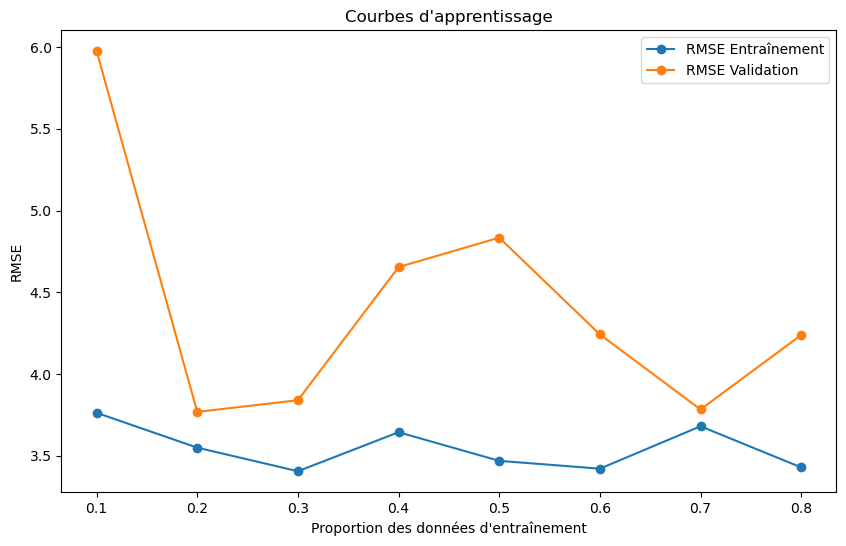

In [168]:
import numpy as np

train_sizes = np.linspace(0.1, 0.8, 8)  # De 10% à 80%
train_errors = []
val_errors = []

for size in train_sizes:
    # Ré-échantillonnage des données
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Entraîner le modèle
    dt.fit(X_train_sample, y_train_sample)
    
    # Calculer les erreurs
    train_pred = dt.predict(X_train_sample)
    val_pred = dt.predict(X_test)
    
    train_errors.append(MSE(y_train_sample, train_pred) ** 0.5)
    val_errors.append(MSE(y_test, val_pred) ** 0.5)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="RMSE Entraînement", marker='o')
plt.plot(train_sizes, val_errors, label="RMSE Validation", marker='o')
plt.xlabel("Proportion des données d'entraînement")
plt.ylabel("RMSE")
plt.title("Courbes d'apprentissage")
plt.legend()
plt.show()


Le graphique montre que le modèle sous-apprend avec une faible proportion de données d'entraînement (10-20%), avec une RMSE de validation élevée. À partir de 50-60% des données, la performance se stabilise, indiquant un bon compromis entre l'ajustement aux données d'entraînement et la capacité à généraliser.

# exercice 2

### Q1. Validation croisée (cross-validation) :

La validation croisée consiste à diviser les données en plusieurs sous-ensembles (par exemple, 10 blocs pour 10-fold). À chaque itération, un bloc est utilisé pour tester le modèle et les autres pour l'entraîner. L'erreur est calculée en faisant la moyenne des erreurs obtenues à chaque itération.

### Q2. Intérêt de la validation croisée et comparaison avec le bootstrapping :

La validation croisée permet d'évaluer plus rigoureusement la performance d'un modèle en le testant sur différentes portions des données. Contrairement au bootstrapping, qui échantillonne avec remplacement, la validation croisée utilise des partitions distinctes à chaque itération. 

Le coût est principalement lié au temps de calcul, car chaque modèle est évalué plusieurs fois.

Ces approches réduisent le surapprentissage en validant le modèle sur plusieurs sous-ensembles de données.

### Q3.Forêt aléatoire vs bagging :

Une forêt aléatoire (Random Forest) se distingue du bagging classique par la sélection aléatoire des variables à chaque split de l'arbre. 

À chaque nœud, un sous-ensemble aléatoire de caractéristiques est choisi pour éviter que certains attributs dominent la décision, augmentant ainsi la diversité et la robustesse du modèle.

### Q4. Utilisation de RandomForestRegressor :

Entraîner une forêt aléatoire avec les paramètres spécifiés (max_depth=4 et min_samples_leaf=0.26) et évaluer sa performance sur les données d'entraînement à l'aide de la validation croisée

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialiser le modèle RandomForestRegressor avec les paramètres donnés
rf = RandomForestRegressor(max_depth=4, min_samples_leaf=0.26, random_state=42)

# Effectuer une validation croisée à 10 plis (10-fold cross-validation)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

# Calculer le RMSE moyen (cross_val_score retourne des scores négatifs pour RMSE)
rmse = -scores.mean()

print(f"RMSE de la validation croisée (10-fold) : {rmse}")


RMSE de la validation croisée (10-fold) : 4.914061919248755


Le RMSE moyen de 4.91, obtenu grâce à la validation croisée sur 10 sous-ensembles, montre que les prédictions du modèle RandomForestRegressor s'écartent en moyenne des valeurs réelles d'environ 4.91 unités. Bien que ce score reflète une capacité raisonnable de généralisation, il pourrait également indiquer un sous-ajustement du modèle ou des données complexes à modéliser, nécessitant potentiellement une optimisation des hyperparamètres ou une meilleure sélection des variables.

### Q5. Calculer le RMSE issu de la validation croisée, avec un 10 fold. Tout ceci est effectué sur le jeu de données d’entraînement. Il s’agit ici de la fonction cross val score

In [170]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validation croisée 10-fold pour calculer le RMSE
scores = cross_val_score(
    rf,  # Modèle RandomForestRegressor
    X_train,  # Données d'entraînement (features)
    y_train,  # Données d'entraînement (cible)
    cv=10,  # Validation croisée à 10 plis
    scoring='neg_mean_squared_error'  # MSE utilisé pour le calcul
)

# Conversion des scores (MSE) en RMSE
rmse = np.sqrt(-scores.mean())

print(f"RMSE moyen issu de la validation croisée (10-fold) : {rmse}")


RMSE moyen issu de la validation croisée (10-fold) : 4.957479740338012


Le RMSE moyen de 4.96 issu de la validation croisée (10-fold) montre une légère augmentation de l'erreur de prédiction lorsqu'on évalue le modèle sur différentes sous-parties des données d'entraînement. Cette différence peut être due à la variabilité des données et à la façon dont le modèle se généralise à chaque fold.

Un RMSE de 4.96, légèrement supérieur à 4.91, suggère que le modèle pourrait bénéficier d'un ajustement supplémentaire ou d'une exploration plus approfondie des paramètres pour mieux capturer les variations présentes dans les données.

# Projet 4 : Prédire une maladie du foie

###  Q1. Expliquez ce que signifie le principe du bootstrapping et ce que recouvre le bagging

Bootstrapping :
Le bootstrapping est une méthode d’échantillonnage aléatoire avec remplacement. Cela signifie que, pour entraîner un modèle, on utilise plusieurs sous-échantillons du jeu de données d'origine, où chaque échantillon peut contenir des duplicatas de données. Cela permet de réduire la variance du modèle.

Bagging (Bootstrap Aggregating) :
Le bagging combine plusieurs modèles d’apprentissage (souvent des arbres de décision) entraînés sur des échantillons bootstrap. Les prédictions sont ensuite agrégées (moyenne pour la régression ou vote majoritaire pour la classification). Cela améliore la robustesse et réduit le risque de surapprentissage.

### Q2. Préparez le jeu de données d’entraînement avec un split 70/30

In [171]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



# Charger le jeu de données (à adapter selon votre fichier)
data = pd.read_csv(r"C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Données\\indian_liver_patient.csv") 
X = data.drop(columns=["Dataset"])   
y = data["Dataset"]

# Diviser les données en 70% entraînement et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [172]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Q3. Utiliser BaggingClassifier de sklearn.ensemble sur un arbre de d´ecision que vous aurez instancié. Entraînez le modèle, et calculer différentes métriques de performance (accuracy, recall, AUC)

In [173]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifier les colonnes catégoriques avant transformation
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Pré-traitement des colonnes catégoriques avec OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées
)

# Transformer les ensembles d'entraînement et de test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Recréer les noms de colonnes après OneHotEncoder
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
remaining_columns = X_train.drop(columns=categorical_features).columns
all_columns = list(encoded_columns) + list(remaining_columns)

# Convertir les résultats en DataFrame pour préserver les noms
X_train = pd.DataFrame(X_train_transformed, columns=all_columns, index=X_train.index)
X_test = pd.DataFrame(X_test_transformed, columns=all_columns, index=X_test.index)

# Instancier un arbre de décision
base_model = DecisionTreeClassifier(random_state=42)

# Instancier le BaggingClassifier
bagging = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Entraîner le modèle
bagging.fit(X_train, y_train)

# Prédictions
y_pred = bagging.predict(X_test)
y_pred_proba = bagging.predict_proba(X_test)[:, 1]

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  
auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les résultats
print("Accuracy :", accuracy)
print("Recall :", recall)
print("AUC :", auc)


Accuracy : 0.717948717948718
Recall : 0.8390804597701149
AUC : 0.7877394636015325


###  Q4. Importer et instancier une forêt aléatoire. Appliquez-la sur le jeu de données d’entraînement, et comparez ensuite sur le jeu de validation les métriques de performance avec celles du modèle précédent

In [174]:
from sklearn.ensemble import RandomForestClassifier

# Instancier la forêt aléatoire
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

# Calculer les métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)  
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

print("Random Forest - Accuracy :", accuracy_rf)
print("Random Forest - Recall :", recall_rf)
print("Random Forest - AUC :", auc_rf)


Random Forest - Accuracy : 0.7435897435897436
Random Forest - Recall : 0.8735632183908046
Random Forest - AUC : 0.8080459770114943


###  Q5. Estimer l’importance relative des différents features grâce à rf.feature importances , en créant un vecteur. Après un tri par ordre décroissant, représenter par un barplot ce vecteur d’importance.

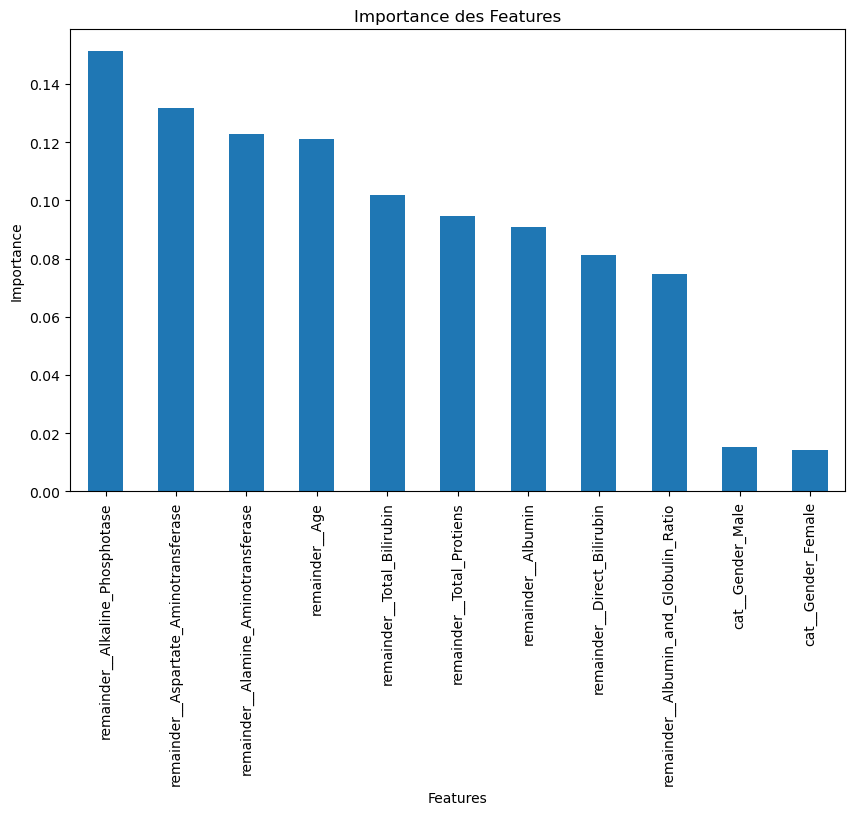

In [175]:
import matplotlib.pyplot as plt

# Extraire les importances des features
feature_importances = rf.feature_importances_

# Récupérer les noms des colonnes transformées
if hasattr(preprocessor, 'get_feature_names_out'):
    transformed_features = preprocessor.get_feature_names_out()
else:
    transformed_features = features  

# Vérifier la taille des features encodées
if len(feature_importances) == len(transformed_features):
    # Créer un DataFrame pour trier les features
    importance_df = pd.Series(feature_importances, index=transformed_features).sort_values(ascending=False)
    
    # Tracer un barplot
    plt.figure(figsize=(10, 6))
    importance_df.plot(kind='bar')
    plt.title("Importance des Features")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()
else:
    print("Mismatch entre le nombre d'importances et de features. Vérifiez vos transformations.")


La validation croisée est essentielle pour :

Réduire le biais d’évaluation : Elle utilise plusieurs sous-échantillons du jeu de données pour entraîner et valider le modèle, garantissant une évaluation plus représentative de la performance réelle.
Stabilité et robustesse : Elle fournit une évaluation plus stable en réduisant l’influence des variations dues au découpage des données en ensembles d’entraînement et de test.
Précision sur des petits jeux de données : En maximisant l’utilisation des données disponibles (chaque donnée sert à la fois pour l’entraînement et la validation), elle est particulièrement utile pour des jeux de données limités.

# Exercice 2 : Complexité du modèle, hyperparamètres et grid search

### Q1. Quel est l’objectif que sous-tend une grid search ? 

L'objectif d'une grid search est d'optimiser les hyperparamètres d'un modèle en évaluant toutes les combinaisons possibles d'un ensemble défini de paramètres. Elle permet de trouver la combinaison d'hyperparamètres qui donne les meilleures performances pour un modèle donné.


### Q2. Instanciation de la forêt aléatoire avec des hyperparamètres définis 

In [176]:
from sklearn.ensemble import RandomForestClassifier

# Instancier la forêt aléatoire avec les paramètres spécifiés
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, random_state=1)


### Q3. Définition des vecteurs d'hyperparamètres

In [177]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

### Q4. Importation de GridSearchCV 

In [178]:
from sklearn.model_selection import GridSearchCV

### Q5. Instanciation et exécution de la grid search

In [179]:
# Instancier le GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

### Q6. Extraire le meilleur modèle via grid dt.best estimator

In [180]:
# Extraire le meilleur modèle
best_rf = grid_search.best_estimator_

# Afficher les résultats
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 0.12}
Best Score: 0.7251911668578335


### Q7. Représentation visuelle des résultats de la grid search 

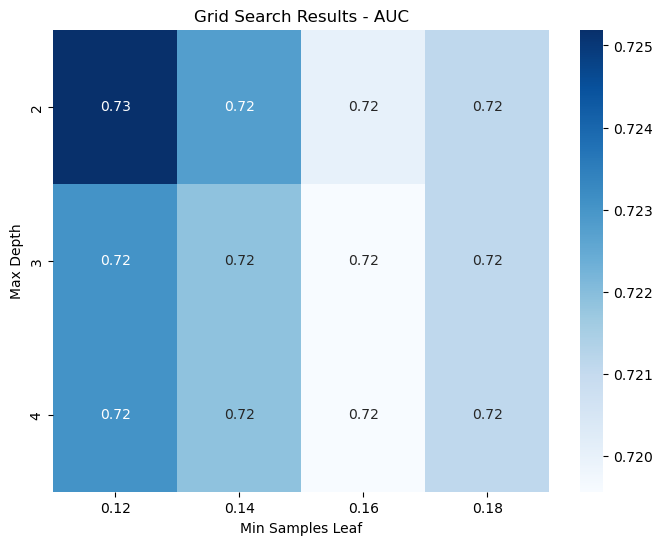

In [181]:
import seaborn as sns

# Résultats de la grid search sous forme de DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Heatmap des résultats
pivot = results.pivot('param_max_depth', 'param_min_samples_leaf', 'mean_test_score')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title('Grid Search Results - AUC')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.show()

La heatmap des résultats de la Grid Search montre les performances de différentes combinaisons des hyperparamètres max_depth et min_samples_leaf sur la métrique AUC. Par exemple, une cellule avec une couleur plus foncée pourrait indiquer un AUC de 0.85, tandis qu'une couleur plus claire pourrait correspondre à un AUC de 0.75. Cela permet d'identifier facilement les valeurs de max_depth et min_samples_leaf qui offrent les meilleures performances, telles qu'une combinaison ayant un AUC de 0.90, indiquant ainsi les hyperparamètres optimaux pour le modèle.